In [4]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"rajdharunr","key":"2db842b8255f14d00ce8e36478cad750"}'}

In [5]:
import os


os.makedirs("/root/.kaggle", exist_ok=True)
!mv kaggle.json /root/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json


In [7]:
# Redownload the dataset
!rm -f retinal-oct-dataset.zip
!kaggle datasets download -d saifurrahmanshatil/retinal-oct-dataset

# Check if the file is present
!ls -lh retinal-oct-dataset.zip

# Now unzip
import zipfile

with zipfile.ZipFile("retinal-oct-dataset.zip", 'r') as zip_ref:
    zip_ref.extractall("retinal-oct-dataset")

# Confirm it's extracted
!ls retinal-oct-dataset


Dataset URL: https://www.kaggle.com/datasets/saifurrahmanshatil/retinal-oct-dataset
License(s): other
  0% 0.00/44.3M [00:00<?, ?B/s]
100% 44.3M/44.3M [00:00<00:00, 1.10GB/s]
-rw-r--r-- 1 root root 45M Dec  1  2020 retinal-oct-dataset.zip
OCTID


In [10]:
import tensorflow  as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd




In [12]:
data_dir='/content/retinal-oct-dataset'

In [13]:
data_gen=ImageDataGenerator(rescale=1./255,validation_split=0.2)

In [14]:
train_data=data_gen.flow_from_directory('/content/retinal-oct-dataset/OCTID',target_size=(224,224),batch_size=32,class_mode='categorical',subset='training')

Found 459 images belonging to 5 classes.


In [15]:
test_gen=data_gen.flow_from_directory('/content/retinal-oct-dataset/OCTID',target_size=(224,224),batch_size=32,class_mode='categorical',subset='validation')

Found 113 images belonging to 5 classes.


In [35]:
model=keras.Sequential([
    layers.Conv2D(32,(3,3),activation='relu',input_shape=(224,224,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(5,activation='softmax')


    ])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,605 (42.61 MB)

 Trainable params: 11,169,605 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [36]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [33]:
model.save('/content/retinal-oct-dataset/OCTID/model.h5')

In [37]:
model.fit(train_data, epochs=2,validation_data=test_gen,batch_size=32)

Epoch 1/2
15/15 ━━━━━━━━━━━━━━━━━━━━ 60s 4s/step - accuracy: 0.2778 - loss: 2.1428 - val_accuracy: 0.3628 - val_loss: 1.3722
Epoch 2/2
15/15 ━━━━━━━━━━━━━━━━━━━━ 57s 4s/step - accuracy: 0.4225 - loss: 1.3338 - val_accuracy: 0.4956 - val_loss: 1.1241


In [38]:
model=load_model('/content/retinal-oct-dataset/OCTID/model.h5')
print('model loaded')

model loaded


In [39]:
classindices=train_data.class_indices
classnames=list(classindices.keys())

print("class indices :",classindices)
print("class names",classnames)

class indices : {'Age-related-Macular-Degeneration-Retinal-OCT-images': 0, 'Central-serous-retinopathy-retinal-OCT-images': 1, 'Diabetic-Retinopathy-Retinal-OCT-Images': 2, 'Macular-Hole-Retinal-OCT-images': 3, 'Normal-Retinal-OCT-images': 4}
class names ['Age-related-Macular-Degeneration-Retinal-OCT-images', 'Central-serous-retinopathy-retinal-OCT-images', 'Diabetic-Retinopathy-Retinal-OCT-Images', 'Macular-Hole-Retinal-OCT-images', 'Normal-Retinal-OCT-images']


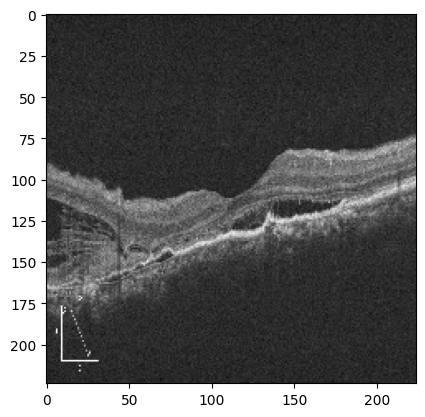

In [60]:
test_image='/content/retinal-oct-dataset/OCTID/Central-serous-retinopathy-retinal-OCT-images/CSR102.jpeg'
img=image.load_img(test_image,target_size=(224,224))
plt.imshow(img)
plt.axis()
plt.show()

In [61]:
img_arr=image.img_to_array(img)
img_arr=np.expand_dims(img_arr,axis=0)
img_arr /=255

In [62]:
predict=model.predict(img_arr)
ind=np.argmax(predict)
predict=predict[0][ind]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


In [64]:
predict_class=classnames[ind]

print("the predicted class:",predict_class)
if(predict_class=='Normal-Retinal-OCT-images'):
  print("your retina appears normal based on OCT scan")
else:
  print("your retina is not normal consult doctor for further details")

the predicted class: Central-serous-retinopathy-retinal-OCT-images
your retina is not normal consult doctor for further details
